In [46]:
from rdkit import Chem
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [47]:
df = pd.read_csv('./kinase_JAK.csv')
df.head()

,SMILES,measurement_type,measurement_value,Kinase_name
0,C#CCCOC(=O)N1CCC(n2cc(C(N)=O)c(Nc3ccc(F)cc3)n2...,pIC50,6.81,JAK2
1,C#CCCOC(=O)N1CCC(n2cc(C(N)=O)c(Nc3ccc(F)cc3)n2...,pIC50,8.05,JAK1
2,C#CCN(c1ccc(C#N)cn1)C1CCN(c2ncnc3[nH]ccc23)C1,pIC50,10.26,JAK2
3,C#CCN(c1ccc(C#N)cn1)C1CCN(c2ncnc3[nH]ccc23)C1,pIC50,10.26,JAK1
4,C#CCNCC1CCC(c2nnn3cnc4[nH]ccc4c23)CC1,pIC50,7.36,JAK2


## Simple statistics and plots comparing the measurement types 
Quick examination of data composition and mean value of each measurement type. 

In [48]:
pIC50 = df[df['measurement_type'] == "pIC50"]["measurement_value"]
pKi = df[df['measurement_type'] == "pKi"]["measurement_value"]

print(f"Length: {len(pIC50)} | Mean: {pIC50.mean()} | Relative Size: {round(len(pIC50) / len(df), 2)}")
print(f"Length: {len(pKi)} | Mean: {pKi.mean()} | Relative Size: {round(len(pKi) / len(df),2)}")

Length: 8736 | Mean: 7.762410714285714 | Relative Size: 0.81
Length: 1989 | Mean: 8.463700351935646 | Relative Size: 0.19


## Histogram Plots 

Compare the distribution of values attributed to each measurement type.

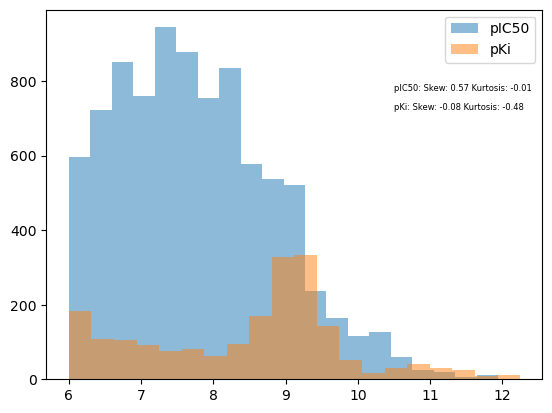

In [49]:
# plot histogram of pIC50 and pKi
plt.hist(pIC50, bins=20, alpha=0.5, label='pIC50')
plt.hist(pKi, bins=20, alpha=0.5, label='pKi')
plt.legend(loc='upper right')
# add labels of skew and kurtosis and set under the legend
plt.text(0.70, 0.78, f"pIC50: Skew: {pIC50.skew():.2f} Kurtosis: {pIC50.kurtosis():.2f}", transform=plt.gca().transAxes, fontsize=6)
plt.text(0.70, 0.73, f"pKi: Skew: {pKi.skew():.2f} Kurtosis: {pKi.kurtosis():.2f}", transform=plt.gca().transAxes, fontsize=6)
plt.show()


### Interessing observations:
* The distribution of values for the measurement types are skewed differently.
* Their means are nearly 1 log unit apart.
* pIC50 comprises 80% of the data, while pKi comprises 20% of the data.

<AxesSubplot: >

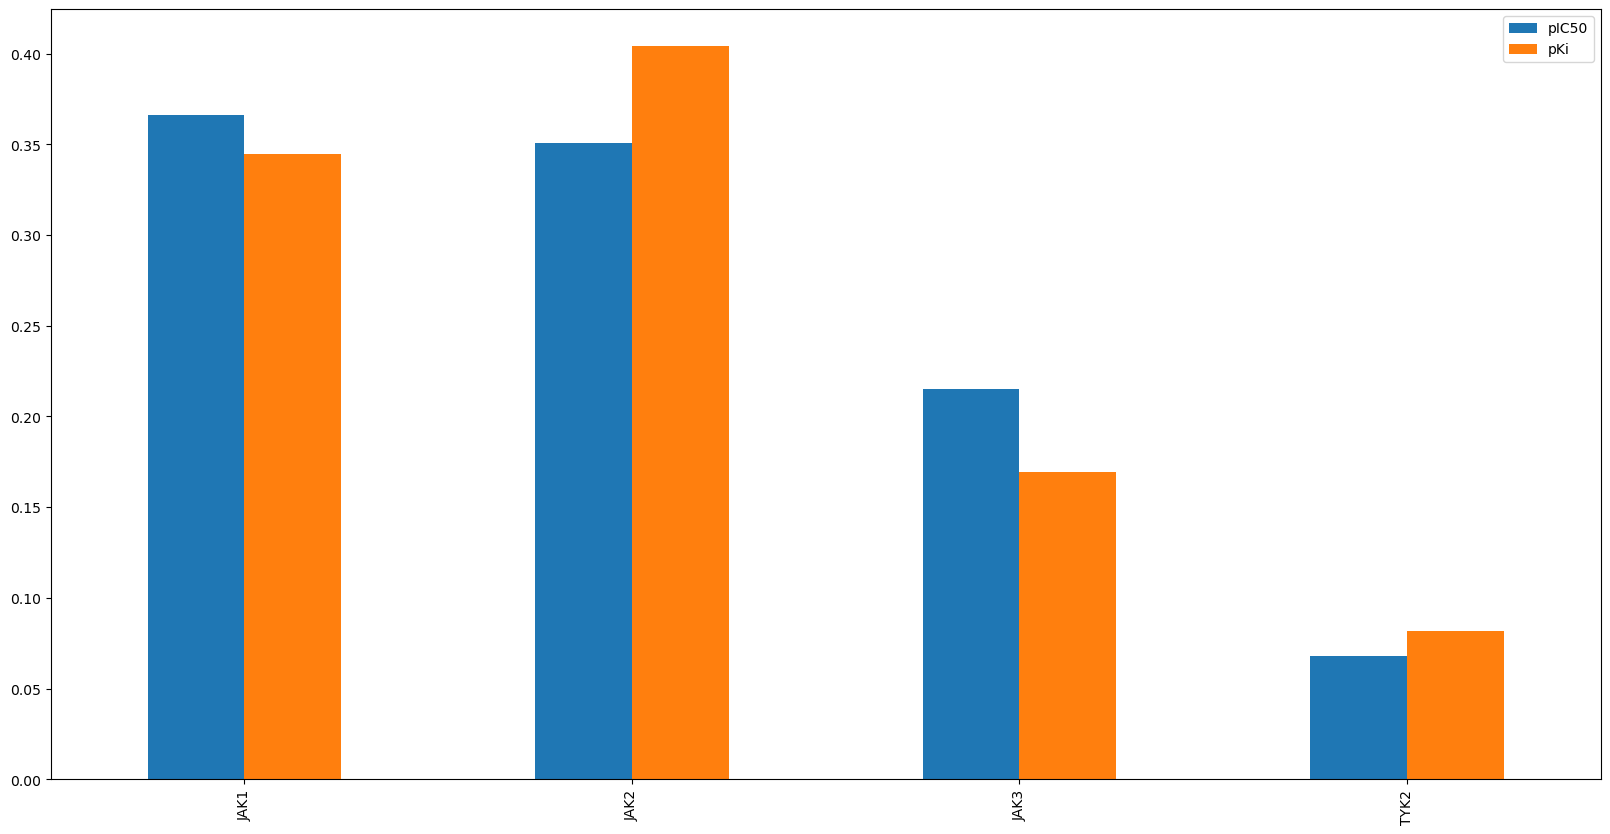

In [50]:
## Breakdown of pIC50 and pKi by kinase
# pIC50
pIC50_kinases = df[df['measurement_type'] == "pIC50"]["Kinase_name"].value_counts()

# pKi
pKi_kinases = df[df['measurement_type'] == "pKi"]["Kinase_name"].value_counts()

pecent_coverage_pIC50 = pIC50_kinases.apply(lambda x: x / len(pIC50))
pecent_coverage_pKi = pKi_kinases.apply(lambda x: x / len(pKi))
df = pd.DataFrame({'pIC50': pecent_coverage_pIC50, 'pKi': pecent_coverage_pKi})
df.plot.bar(figsize=(20,10))

Examing their relative compositions amongst the kinases shows there is no bias amongst a particular measurement type to a particular kinase. In an attempt to remove extraneous noise from measurement data, pKi will be excluded from the dataset. I believe this won't affect much since it only comprised 20% of the total starting data and has a rather flat distribution of sample data.

_Continues in AAE_MLP_Training.ipynb_